In [12]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
# Import Data from CSV file
dataset = file_path = '/content/Online retails.xlsx'
dataset = pd.read_excel(file_path)
dataset = dataset.replace(np.nan, '', regex=True)
dataset

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,
7498,chicken,,,,,,,,,,,,,,,,,,,
7499,escalope,green tea,,,,,,,,,,,,,,,,,,


In [14]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,u]) for u in range(0, 19)])

In [15]:
retail_series  = pd.DataFrame(pd.Series(transactions))
retail_series
retail_series.columns = ["business"]
retail_series
X = retail_series['business'].str.join(sep=',').str.get_dummies(sep=',')
X

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Define support and confidence values to test
support_values = [0.01, 0.02, 0.03, 0.04, 0.05]
confidence_values = [0.2, 0.4, 0.6, 0.8]

In [17]:
results = []
# Generate association rules for each combination of support and confidence
for support in support_values:
    freq_items = apriori(X, min_support=support, use_colnames=True)
    print("Frequent Items:\n",freq_items)
    for confidence in confidence_values:
        rules = association_rules(freq_items, metric="confidence", min_threshold=confidence)
        rules.sort_values('lift',ascending = False).head(10)
        print("Rules:\n",rules.head(20))
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Items:
       support                                 itemsets
0    0.020397                                (almonds)
1    0.033329                                (avocado)
2    0.010799                         (barbecue sauce)
3    0.014265                              (black tea)
4    0.011465                             (body spray)
..        ...                                      ...
252  0.011065       (ground beef, mineral water, milk)
253  0.017064  (spaghetti, mineral water, ground beef)
254  0.015731         (spaghetti, mineral water, milk)
255  0.010265    (spaghetti, mineral water, olive oil)
256  0.011465     (spaghetti, mineral water, pancakes)

[257 rows x 2 columns]
Rules:
       antecedents      consequents  antecedent support  consequent support  \
0       (avocado)  (mineral water)            0.033329            0.238368   
1       (burgers)           (eggs)            0.087188            0.179709   
2       (burgers)   (french fries)            0.087188   

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Items:
       support                           itemsets
0    0.020397                          (almonds)
1    0.033329                          (avocado)
2    0.033729                         (brownies)
3    0.087188                          (burgers)
4    0.030129                           (butter)
..        ...                                ...
98   0.020131  (mineral water, whole wheat rice)
99   0.022930             (spaghetti, olive oil)
100  0.025197              (spaghetti, pancakes)
101  0.021197                (spaghetti, shrimp)
102  0.020931              (tomatoes, spaghetti)

[103 rows x 2 columns]
Rules:
             antecedents      consequents  antecedent support  \
0             (burgers)           (eggs)            0.087188   
1             (burgers)   (french fries)            0.087188   
2             (burgers)  (mineral water)            0.087188   
3             (burgers)      (spaghetti)            0.087188   
4                (cake)  (mineral water)   

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Items:
      support                      itemsets
0   0.087188                     (burgers)
1   0.081056                        (cake)
2   0.046794                   (champagne)
3   0.059992                     (chicken)
4   0.163845                   (chocolate)
5   0.080389                     (cookies)
6   0.051060                 (cooking oil)
7   0.179709                        (eggs)
8   0.079323                    (escalope)
9   0.170911                (french fries)
10  0.043061                 (fresh bread)
11  0.063325             (frozen smoothie)
12  0.095321           (frozen vegetables)
13  0.052393               (grated cheese)
14  0.132116                   (green tea)
15  0.098254                 (ground beef)
16  0.049460               (herb & pepper)
17  0.047460                       (honey)
18  0.076523              (low fat yogurt)
19  0.129583                        (milk)
20  0.238368               (mineral water)
21  0.065725                   (olive

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Result",results_df)

Result     support  confidence  num_rules
0      0.01         0.2        162
1      0.01         0.4         18
2      0.01         0.6          0
3      0.01         0.8          0
4      0.02         0.2         55
5      0.02         0.4          3
6      0.02         0.6          0
7      0.02         0.8          0
8      0.03         0.2         27
9      0.03         0.4          1
10     0.03         0.6          0
11     0.03         0.8          0
12     0.04         0.2          9
13     0.04         0.4          1
14     0.04         0.6          0
15     0.04         0.8          0
16     0.05         0.2          6
17     0.05         0.4          0
18     0.05         0.6          0
19     0.05         0.8          0


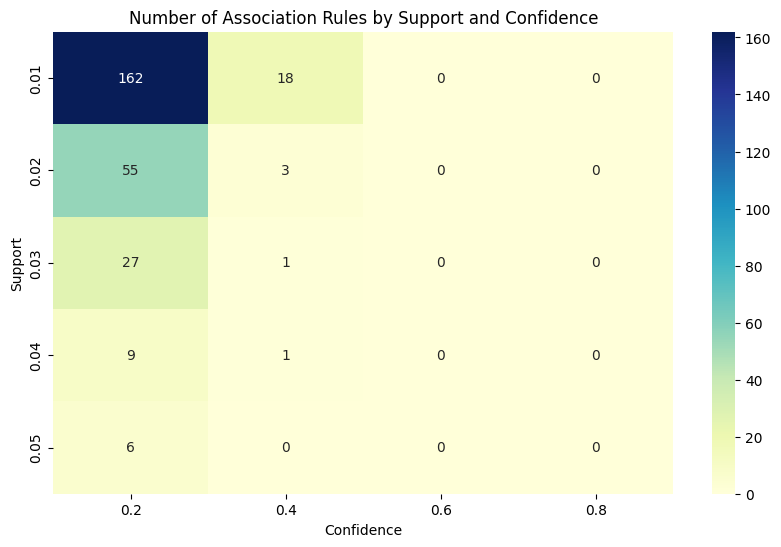

In [19]:
# Pivot for heatmap
pivot_df = results_df.pivot(index="support", columns="confidence", values= "num_rules")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Association Rules by Support and Confidence")
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

In [20]:
# Inferences from the Heatmap:
#1.Lower support gives more rules
#2.Higher confidence gives fewer rules
#3.Best range for balanced rules
#4.Very high support & confidence = very few rules
#5.Very low support & confidence = too many rules
#To get meaningful and manageable rules, it is important to balance support and confidence i.e.not too high and not too low.